# Topic: Correlation between student health and academic performance
### Group 7: Bansri Patel, Justin Yee, Kapilan Ramasamy, Nathaniel Morales, Shreya Agarwal

### 1. What data do you have?

### 2. What would you like to know?

### 3. Explore and present the data. (Generate statistics, perform visualizations)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pearsonr

                   Average_GPA
prioritize_health             
0.0                   3.472222
1.0                   3.451754


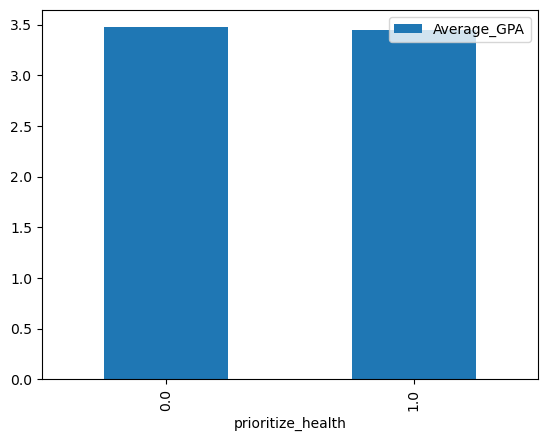

In [2]:
# Load the data
df = pd.read_csv('data.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Convert prioritize_health to numerical values
df['prioritize_health'] = df['prioritize_health'].apply(lambda x: 1 if x == 'Yes' else 0).astype(float)

# Format the GPA column
df['UCR_GPA'] = df['UCR_GPA'].str.replace('Below 2.0', '').str.replace('Prefer not to say', '')
# Step 1: Split the GPA column into two new columns
df[['Lower_GPA', 'Upper_GPA']] = df['UCR_GPA'].str.split(' - ', expand=True)

# Step 2: Convert the new columns to numerical values
df['Lower_GPA'] = pd.to_numeric(df['Lower_GPA'].replace('Below', '2.0'))
df['Upper_GPA'] = pd.to_numeric(df['Upper_GPA'].replace('Below', '2.0'))

# Step 3: Calculate the average GPA
df['Average_GPA'] = (df['Lower_GPA'] + df['Upper_GPA']) / 2

#pivot table showing average GPA for students who prioritize health, and students who do not prioritize health.
health_priority_gpa = df.pivot_table(index=['prioritize_health'], values=['Average_GPA'], aggfunc='mean')
health_priority_gpa.plot(kind = 'bar')

print(health_priority_gpa)


### 4. Can you state any hypotheses or make predictions? Which tests can you apply to verify your hypothesis?
- Hypothesis 1: There is a positive correlation between prioritizing health and academic success\
Prediction: Those who prioritize health and have a good mental well being perform better in school\
Test: Calculate the correlation coefficient between responses to health prioritization and UCR cumulative GPA.

- Hypothesis 2: Imposter syndrome negatively impacts mental wellbeing\
Prediction: Those who get imposter syndrome more frequently feel worse about themselves and do worse in school\
Test: Assess the correlation between experiences of imposter syndrome and the current state of mental wellbeing.

- Hypothesis 3: Financial stress negatively influences academic performance\
Prediction: Those who are stressed by finances do worse in school\
Test: Compare the average academic performance (UCR cumulative GPA) between those who report being stressed about their financial situation and those who do not.

### 5. Test your hypotheses.

In [3]:
# Hypothesis 1
# 1. Correlation Analysis (Pearson correlation)
pearson_corr = df['prioritize_health'].corr(df['Average_GPA'])
print("Hypothesis 1 results:")
print(f"Pearson Correlation: {pearson_corr}")

# 2. Correlation Analysis (Spearman rank correlation)
spearman_corr = df['prioritize_health'].corr(df['Average_GPA'], method='spearman')
print(f"Spearman Rank Correlation: {spearman_corr}\n")


# Hypothesis 2
# 1. Correlation Analysis (Pearson correlation)
# Create a list of imposter syndrome columns for different grade levels
imposter_syndrome_columns = ['imposter_syndrome_freshman', 'imposter_syndrome_sophomore', 'imposter_syndrome_junior', 'imposter_syndrome_senior', 'imposter_syndrome_graduate']

# Calculate the mean imposter syndrome score across grade levels
df['mean_imposter_syndrome'] = df[imposter_syndrome_columns].mean(axis=1)

# Assess the correlation between mean imposter syndrome score and mental wellbeing
pearson_corr_imp = df['mean_imposter_syndrome'].corr(df['mental_wellbeing'])
print("Hypothesis 2 results:")
print(f"Pearson Correlation (Imposter Syndrome vs Mental Wellbeing): {pearson_corr_imp}")

# Create a contingency table for imposter syndrome and academic performance
contingency_table_imp = pd.crosstab(df['mean_imposter_syndrome'], df['Average_GPA'])

# Perform Chi-Squared Test
chi2_stat_imp, p_value_chi2_imp, _, _ = chi2_contingency(contingency_table_imp)

print(f"Chi-Squared Statistic: {chi2_stat_imp}")
print(f"P-value (Chi-Squared Test): {p_value_chi2_imp}")

# Check for significance
if p_value_chi2_imp < 0.05:
    print("There is a significant relationship between mean imposter syndrome and academic performance.\n")
else:
    print("There is no significant relationship between mean imposter syndrome and academic performance.\n")


# Hypothesis 3
# Calculate the mean financial stress score across grade levels
df['mean_financial_stress'] = df['financial_stress'].mean()

# Assess the correlation between mean financial stress score and academic performance
pearson_corr_financial = df['mean_financial_stress'].corr(df['Average_GPA'])
print("Hypothesis 3 results:")
print(f"Pearson Correlation (Financial Stress vs Academic Performance): {pearson_corr_financial}")

from scipy.stats import ttest_ind

# Separate the data into two groups based on financial stress (e.g., high vs. low)
high_financial_stress = df[df['financial_stress'] > 3]['Average_GPA']
low_financial_stress = df[df['financial_stress'] <= 3]['Average_GPA']

# Perform independent t-test
t_stat_financial, p_value_financial = ttest_ind(high_financial_stress, low_financial_stress, equal_var=False)

print(f"T-statistic (Financial Stress vs Academic Performance): {t_stat_financial}")
print(f"P-value (Financial Stress vs Academic Performance): {p_value_financial}")

# Check for significance
if p_value_financial < 0.05:
    print("There is a significant difference in academic performance based on financial stress.")
else:
    print("There is no significant difference in academic performance based on financial stress.")






Hypothesis 1 results:
Pearson Correlation: -0.025264091407949805
Spearman Rank Correlation: -0.009146670939243462

Hypothesis 2 results:
Pearson Correlation (Imposter Syndrome vs Mental Wellbeing): -0.29413551572595575
Chi-Squared Statistic: 79.99387484926785
P-value (Chi-Squared Test): 0.8805169099965947
There is no significant relationship between mean imposter syndrome and academic performance.

Hypothesis 3 results:
Pearson Correlation (Financial Stress vs Academic Performance): nan
T-statistic (Financial Stress vs Academic Performance): nan
P-value (Financial Stress vs Academic Performance): nan
There is no significant difference in academic performance based on financial stress.


# Hypothesis 1
### Test 1: Pearson Coefficient
Since the Pearson Correlation Coefficient is close to 0, that means that there is actually close to no correlation between whether people prioritize health and how well they do in school. 

### 6. Draw the overall conclusion